# Overview

## Methods

1. Understand statistical signifcance of features
2. Create Visualization to convery statistical significance
3. Perform statistical tests to understand feature significance

## Library Import

In [2]:
import pandas as pd
pd.set_option("display.max_columns", 300)

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import scipy.stats as stat

%matplotlib inline

## Import Data

In [3]:
# pre-cleaned data
clean_df = pd.read_csv(r"..\data\diabetic_data_preclean.csv", index_col=0)

## T-test on Select Features

alpha = 0.5 <br>

Selected Features = Number of Medication, Procedure, and Lab Procedures <Br>

Null Hypothesis: Selected Features are not significant factors determining readmission. <br>
Alternative Hypothesis: Selected Features are significant factors determining readmission. <br>

In [4]:
features = ["num_medications", "num_procedures", "num_lab_procedures", "number_outpatient", "number_inpatient"]
alpha = 0.05

for feature in features:
    #slice data
    readmit_0 = clean_df[clean_df.readmitted == 0][feature]
    readmit_1 = clean_df[clean_df.readmitted == 1][feature]
    readmit_2 = clean_df[clean_df.readmitted == 2][feature]
    
    #series of t-test
    num_med_0_1 = stat.ttest_ind(readmit_0, readmit_1, equal_var = False)[1]
    num_med_1_2 = stat.ttest_ind(readmit_1, readmit_2, equal_var = False)[1]
    num_med_0_2 = stat.ttest_ind(readmit_0, readmit_2, equal_var = False)[1]
    
    if num_med_0_1 <= alpha:
        print(f"{feature} T-test for readmission 0 vs 1 P-value: ", num_med_0_1)
        print("Reject Null Hypothesis", "\n")
    else:
        print(f"{feature} T-test for readmission 0 vs 1 P-value: ", num_med_0_1)
        print("FAILURE to Reject Null Hypothesis", "\n")
    if num_med_1_2 <= alpha:
        print(f"{feature} T-test for readmission 1 vs 2 P-value: ", num_med_1_2)
        print("Reject Null Hypothesis", "\n")
    else:
        print(f"{feature} T-test for readmission 1 vs 2 P-value: ", num_med_1_2)
        print("FAILURE to Reject Null Hypothesis", "\n")
    if num_med_0_2 <= alpha:
        print(f"{feature} T-test for readmission 0 vs 2 P-value: ", num_med_0_2)
        print("Reject Null Hypothesis", "\n")
    else:
        print(f"{feature} T-test for readmission 0 vs 2 P-value: ", num_med_0_2)
        print("FAILURE to Reject Null Hypothesis", "\n")

num_medications T-test for readmission 0 vs 1 P-value:  2.149293623995029e-48
Reject Null Hypothesis 

num_medications T-test for readmission 1 vs 2 P-value:  5.853119998295598e-13
Reject Null Hypothesis 

num_medications T-test for readmission 0 vs 2 P-value:  1.1152690198545309e-29
Reject Null Hypothesis 

num_procedures T-test for readmission 0 vs 1 P-value:  3.495894289451428e-14
Reject Null Hypothesis 

num_procedures T-test for readmission 1 vs 2 P-value:  0.07753339914164716
FAILURE to Reject Null Hypothesis 

num_procedures T-test for readmission 0 vs 2 P-value:  7.285489746058182e-44
Reject Null Hypothesis 

num_lab_procedures T-test for readmission 0 vs 1 P-value:  2.859491382144581e-20
Reject Null Hypothesis 

num_lab_procedures T-test for readmission 1 vs 2 P-value:  0.06186164189328136
FAILURE to Reject Null Hypothesis 

num_lab_procedures T-test for readmission 0 vs 2 P-value:  1.7302681119088142e-27
Reject Null Hypothesis 

number_outpatient T-test for readmission 0 vs 1

#### T-test Results

- Null hypothesis can be rejected for number of medications, statistical significance were found between number of medication in determining readmission status

- Failed to reject null hypothesis on statistical significance of number of procedures determining readmission within or after 30 days. 

- Failed to reject null hypothesis on statistical significance of number of lab procedures determining readmission within or after 30 days. 

- Number of inpatient T-test displaying p-values of 0 demonstrated very large frequency imbalance between the three groups. 

## Violin Plot of significant features

Number of medication, number of inpatient visits, and number of outpatient visits were all significant factors in determining readmission possibility for all outcomes. 

### Number of Medications

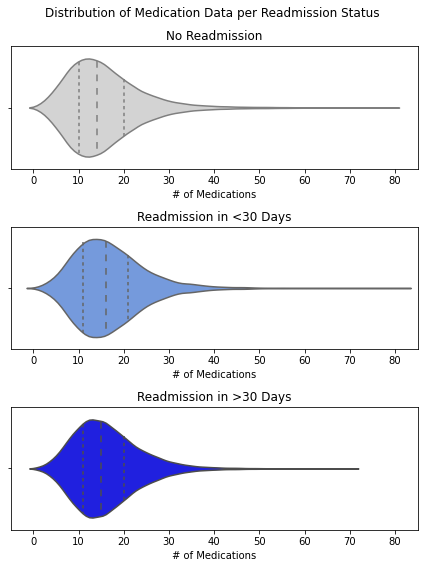

In [6]:
#set color?
sns.set_palette("rocket")
#data slice
x0 = clean_df[clean_df.readmitted == 0]["num_medications"]
x1 = clean_df[clean_df.readmitted == 1]["num_medications"]
x2 = clean_df[clean_df.readmitted == 2]["num_medications"]

#set subplots
fig, ax = plt.subplots(3,1, figsize=(6,8))
#subplot 1
sns.violinplot(x0, color="lightgrey", ax=ax[0], inner="quartile")
ax[0].set_title("No Readmission")
ax[0].set_xlim(-5,85)
ax[0].set_xlabel("# of Medications")

#subplot 2
sns.violinplot(x1, color="cornflowerblue", ax=ax[1], inner="quartile")
ax[1].set_title("Readmission in <30 Days")
ax[1].set_xlim(-5,85)
ax[1].set_xlabel("# of Medications")

#subplot 3
sns.violinplot(x2, color="blue", ax=ax[2], inner="quartile")
ax[2].set_title("Readmission in >30 Days")
ax[2].set_xlim(-5,85)
ax[2].set_xlabel("# of Medications")

#prettify
plt.suptitle("Distribution of Medication Data per Readmission Status")
plt.tight_layout(); #make it neat

plt.show();

Number of medications have small data spared difference when divided by readmission status. First, the readmission within <30 days had highest spread in number of medication. Second, the mean medication among this group was higher than mean of other readmission status. This can be interpreted as high risk (more likely to return) patients are assigned more medicaiton to support them. 

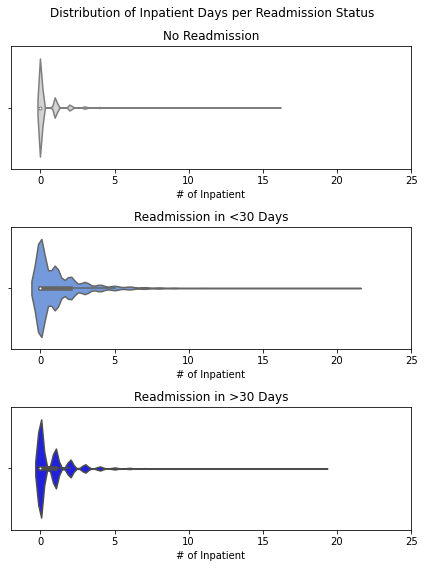

In [7]:
# data slice
x0 = clean_df[clean_df.readmitted == 0]["number_inpatient"]
x1 = clean_df[clean_df.readmitted == 1]["number_inpatient"]
x2 = clean_df[clean_df.readmitted == 2]["number_inpatient"]

# plot
fig, ax = plt.subplots(3,1, figsize=(6,8))
# subplot 1
sns.violinplot(x0, color="lightgrey", alpha=0.7, ax=ax[0])
ax[0].set_title("No Readmission")
ax[0].set_xlim(-2, 25)
ax[0].set_xlabel("# of Inpatient")

# subplot 2
sns.violinplot(x1, color="cornflowerblue", alpha=0.7, ax=ax[1])
ax[1].set_title("Readmission in <30 Days")
ax[1].set_xlim(-2, 25)
ax[1].set_xlabel("# of Inpatient")

# subplot 3
sns.violinplot(x2, color="blue", alpha=0.7, ax=ax[2])
ax[2].set_title("Readmission in >30 Days")
ax[2].set_xlim(-2, 25)
ax[2].set_xlabel("# of Inpatient")

# prettify
plt.suptitle("Distribution of Inpatient Days per Readmission Status")
plt.tight_layout(); #make it neat

plt.show();

Number of inpatient days demonstrated significant data spread when separated by readmission status. Readmission within 30 days shows higher frequency and spared of number of inpatient days. Most patients with no readmission had 0 inpatient visits. 